In [1]:
#A dataset comprising the price, address, number of bathrooms, number of bedrooms, city, and 
#province of real estate listings for Canada's
#top 45 most populous cities, according to the 2021 census.


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#The character in the dataset is not compling with the diffult encoding
Housing = pd.read_csv('HousePricing.csv', encoding='ISO-8859-1')
Housing

City      Price                     Address  Number_Beds  \
0      Toronto   779900.0       #318 -20 SOUTHPORT ST            3   
1      Toronto   799999.0       #818 -60 SOUTHPORT ST            3   
2      Toronto   799900.0     #714 -859 THE QUEENSWAY            2   
3      Toronto  1200000.0            275 MORTIMER AVE            4   
4      Toronto   668800.0       #420 -388 RICHMOND ST            1   
...        ...        ...                         ...          ...   
35763  Halifax   439900.0  301 60 Walter Havill Drive            2   
35764  Halifax  6990000.0      1160 Rockcliffe Street            5   
35765  Halifax   419900.0  212 60 Walter Havill Drive            2   
35766  Halifax   949900.0           10 Idlewylde Road            3   
35767  Halifax   592900.0     208 2842-2856 Gottingen            2   

       Number_Baths     Province  Population  Latitude  Longitude  \
0                 2      Ontario     5647656   43.7417   -79.3733   
1                 1      Ontario     5647656   43.7417   -79.3733   
2                 2      Ontario     5647656   43.7417   -79.3733   
3                 2      Ontario     5647656   43.7417   -79.3733   
4                 1      Ontario     5647656   43.7417   -79.3733   
...             ...          ...         ...       ...        ...   
35763             2  Nova Scotia      431479   44.8857    63.1005   
35764             5  Nova Scotia      431479   44.8857    63.1005   
35765             2  Nova Scotia      431479   44.8857    63.1005   
35766             1  Nova Scotia      431479   44.8857    63.1005   
35767             1  Nova Scotia      431479   44.8857    63.1005   

       Median_Family_Income  
0                   97000.0  
1                   97000.0  
2                   97000.0  
3                   97000.0  
4                   97000.0  
...                     ...  
35763               86753.0  
35764               86753.0  
35765               86753.0  
35766               86753.0  
35767               86753.0  

[35768 rows x 10 columns]

In [43]:
# missing values
Housing.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [44]:
Housing.describe()

Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.576800e+04  35768.000000  35768.000000  3.576800e+04  35768.000000   
mean   9.432963e+05      3.283661      2.532403  6.360151e+05     47.446556   
std    1.020110e+06      1.730654      1.371910  1.120016e+06      3.333855   
min    2.150000e+04      0.000000      0.000000  6.338200e+04     42.283300   
25%    4.599000e+05      2.000000      2.000000  1.091670e+05     43.866700   
50%    6.990000e+05      3.000000      2.000000  2.424600e+05     49.025000   
75%    1.095000e+06      4.000000      3.000000  5.228880e+05     49.888100   
max    3.700000e+07    109.000000     59.000000  5.647656e+06     53.916900   

          Longitude  Median_Family_Income  
count  35768.000000          35768.000000  
mean     -98.421636          89643.103416  
std       22.280935          12132.353510  
min     -123.936400          62400.000000  
25%     -122.316700          82000.000000  
50%     -104.606700          89000.000000  
75%      -79.866700          97000.000000  
max       63.100500         133000.000000

In [45]:
#Cheking the outliers(Price)
sns.boxplot(y='Price', data=Housing)

<Axes: ylabel='Price'>

In [46]:
#Number_Beds
sns.boxplot(y='Number_Beds', data=Housing)

<Axes: ylabel='Number_Beds'>

<Axes: ylabel='Number_Baths'>

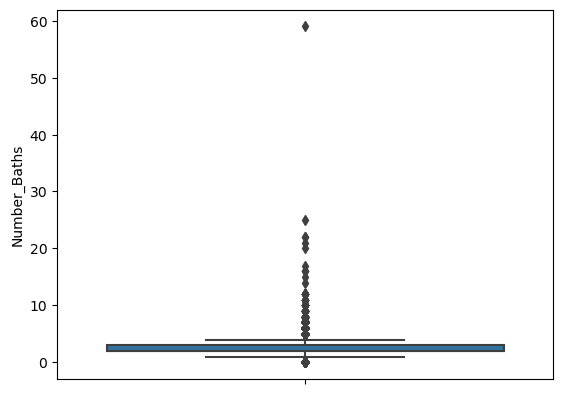

In [47]:
#Number_Baths
sns.boxplot(y='Number_Baths', data=Housing)

<Axes: ylabel='Population'>

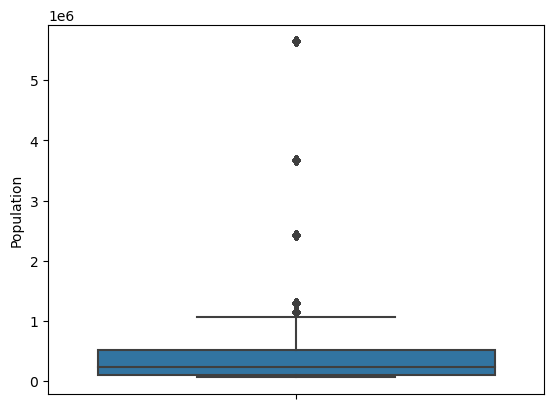

In [48]:
#Population
sns.boxplot(y='Population', data=Housing)

In [49]:
#Check for linear relationship for Numericalcolumn
sns.scatterplot(data=Housing, y="Price", x="Population")

<Axes: xlabel='Population', ylabel='Price'>

In [50]:
sns.scatterplot(data=Housing, y="Price", x="Number_Beds")

<Axes: xlabel='Number_Beds', ylabel='Price'>

<Axes: xlabel='Number_Baths', ylabel='Price'>

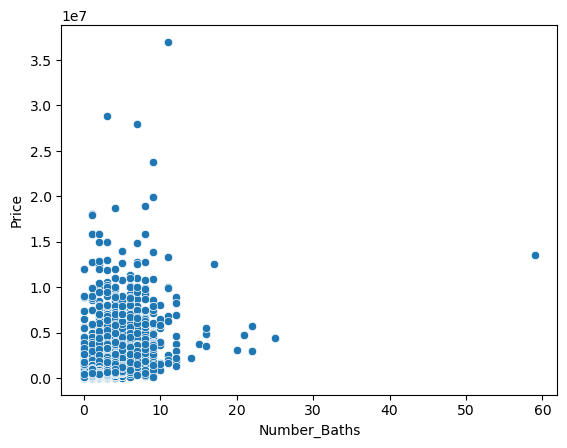

In [51]:
sns.scatterplot(data=Housing, y="Price", x="Number_Baths")

<Axes: xlabel='count', ylabel='Province'>

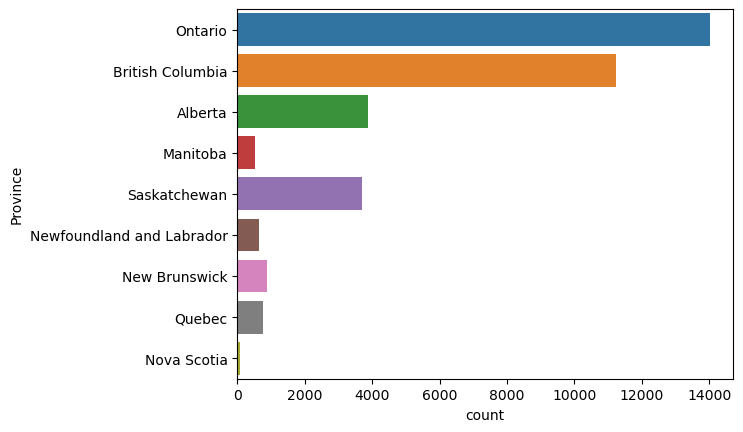

In [52]:
#Categorical column
sns.countplot(y= "Province", data = Housing)

In [53]:
sns.countplot(y= "City", data = Housing)

<Axes: xlabel='count', ylabel='City'>

<Axes: xlabel='Price', ylabel='Count'>

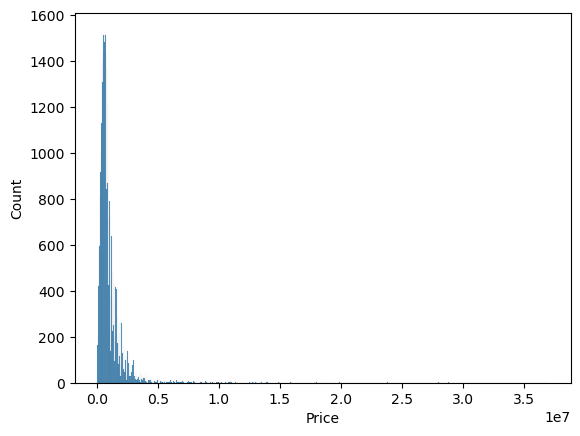

In [54]:
#histogram
sns.histplot(x= "Price", data = Housing)

<Axes: ylabel='Price'>

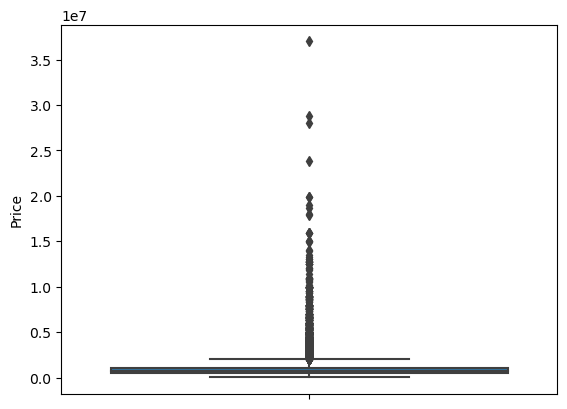

In [55]:
sns.boxplot(y= "Price", data = Housing)

In [56]:
#Removing the outlier for Price
#Trimming and capping
lowerLimit = Housing["Price"].quantile(0.00)

In [57]:
upperLimit = Housing["Price"].quantile(0.93)
upperLimit

1999999.0

In [58]:
#To comfirm
Housing['new_price'] = Housing['Price'].clip(lowerLimit, upperLimit)

In [59]:
Housing

City      Price                     Address  Number_Beds  \
0      Toronto   779900.0       #318 -20 SOUTHPORT ST            3   
1      Toronto   799999.0       #818 -60 SOUTHPORT ST            3   
2      Toronto   799900.0     #714 -859 THE QUEENSWAY            2   
3      Toronto  1200000.0            275 MORTIMER AVE            4   
4      Toronto   668800.0       #420 -388 RICHMOND ST            1   
...        ...        ...                         ...          ...   
35763  Halifax   439900.0  301 60 Walter Havill Drive            2   
35764  Halifax  6990000.0      1160 Rockcliffe Street            5   
35765  Halifax   419900.0  212 60 Walter Havill Drive            2   
35766  Halifax   949900.0           10 Idlewylde Road            3   
35767  Halifax   592900.0     208 2842-2856 Gottingen            2   

       Number_Baths     Province  Population  Latitude  Longitude  \
0                 2      Ontario     5647656   43.7417   -79.3733   
1                 1      Ontario     5647656   43.7417   -79.3733   
2                 2      Ontario     5647656   43.7417   -79.3733   
3                 2      Ontario     5647656   43.7417   -79.3733   
4                 1      Ontario     5647656   43.7417   -79.3733   
...             ...          ...         ...       ...        ...   
35763             2  Nova Scotia      431479   44.8857    63.1005   
35764             5  Nova Scotia      431479   44.8857    63.1005   
35765             2  Nova Scotia      431479   44.8857    63.1005   
35766             1  Nova Scotia      431479   44.8857    63.1005   
35767             1  Nova Scotia      431479   44.8857    63.1005   

       Median_Family_Income  new_price  
0                   97000.0   779900.0  
1                   97000.0   799999.0  
2                   97000.0   799900.0  
3                   97000.0  1200000.0  
4                   97000.0   668800.0  
...                     ...        ...  
35763               86753.0   439900.0  
35764               86753.0  1999999.0  
35765               86753.0   419900.0  
35766               86753.0   949900.0  
35767               86753.0   592900.0  

[35768 rows x 11 columns]

In [60]:
sns.boxplot(y="new_price", data = Housing)

<Axes: ylabel='new_price'>

In [61]:
#Removing the outlier for Number_Beds
#Trimming and capping
lowerLimit = Housing["Number_Beds"].quantile(0.00)

In [62]:
upperLimit = Housing["Number_Beds"].quantile(0.98)
upperLimit

7.0

In [63]:
#To comfirm
Housing['new_number_beds'] = Housing['Number_Beds'].clip(lowerLimit, upperLimit)

In [64]:
sns.boxplot(y="new_number_beds", data = Housing)

<Axes: ylabel='new_number_beds'>

In [81]:
#Removing the outlier for Number_Baths
#Trimming and capping
lowerLimit = Housing["Number_Baths"].quantile(0.05)

In [82]:
upperLimit = Housing["Number_Baths"].quantile(0.92)
upperLimit

4.0

In [83]:
#To comfirm
Housing['new_number_baths'] = Housing['Number_Baths'].clip(lowerLimit, upperLimit)

In [84]:
sns.boxplot(y="new_number_baths", data = Housing)

<Axes: ylabel='new_number_baths'>

In [69]:
#Removing the outlier for Population
#Trimming and capping
lowerLimit = Housing["Population"].quantile(0.00)

In [89]:
upperLimit = Housing["Population"].quantile(0.84)
upperLimit

1068821.0

In [90]:
#To comfirm
Housing['new_population'] = Housing['Population'].clip(lowerLimit, upperLimit)

In [91]:
sns.boxplot(y="new_population", data = Housing)

<Axes: ylabel='new_population'>

<Axes: xlabel='new_price', ylabel='Count'>

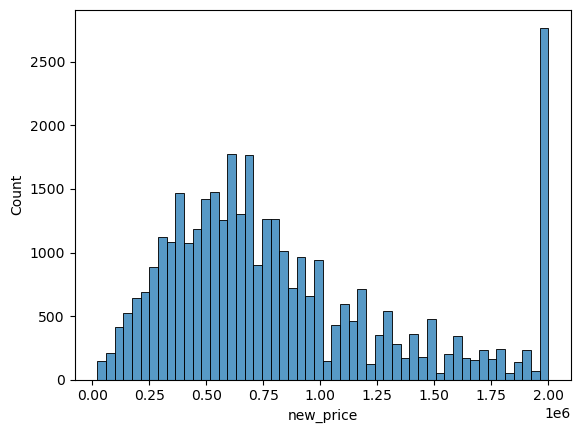

In [92]:
sns.histplot(x= "new_price", data = Housing)

In [74]:
#Encoding and transcribing of the catigorical column

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
#creating an object from the Label Encoding class for City
Le = LabelEncoder()
Housing["new_city"] = Le.fit_transform(Housing["City"])


In [77]:
Housing

City      Price                     Address  Number_Beds  \
0      Toronto   779900.0       #318 -20 SOUTHPORT ST            3   
1      Toronto   799999.0       #818 -60 SOUTHPORT ST            3   
2      Toronto   799900.0     #714 -859 THE QUEENSWAY            2   
3      Toronto  1200000.0            275 MORTIMER AVE            4   
4      Toronto   668800.0       #420 -388 RICHMOND ST            1   
...        ...        ...                         ...          ...   
35763  Halifax   439900.0  301 60 Walter Havill Drive            2   
35764  Halifax  6990000.0      1160 Rockcliffe Street            5   
35765  Halifax   419900.0  212 60 Walter Havill Drive            2   
35766  Halifax   949900.0           10 Idlewylde Road            3   
35767  Halifax   592900.0     208 2842-2856 Gottingen            2   

       Number_Baths     Province  Population  Latitude  Longitude  \
0                 2      Ontario     5647656   43.7417   -79.3733   
1                 1      Ontario     5647656   43.7417   -79.3733   
2                 2      Ontario     5647656   43.7417   -79.3733   
3                 2      Ontario     5647656   43.7417   -79.3733   
4                 1      Ontario     5647656   43.7417   -79.3733   
...             ...          ...         ...       ...        ...   
35763             2  Nova Scotia      431479   44.8857    63.1005   
35764             5  Nova Scotia      431479   44.8857    63.1005   
35765             2  Nova Scotia      431479   44.8857    63.1005   
35766             1  Nova Scotia      431479   44.8857    63.1005   
35767             1  Nova Scotia      431479   44.8857    63.1005   

       Median_Family_Income  new_price  new_number_beds  new_number_baths  \
0                   97000.0   779900.0                3                 2   
1                   97000.0   799999.0                3                 1   
2                   97000.0   799900.0                2                 2   
3                   97000.0  1200000.0                4                 2   
4                   97000.0   668800.0                1                 1   
...                     ...        ...              ...               ...   
35763               86753.0   439900.0                2                 2   
35764               86753.0  1999999.0                5                 5   
35765               86753.0   419900.0                2                 2   
35766               86753.0   949900.0                3                 1   
35767               86753.0   592900.0                2                 1   

       new_population  new_city  
0             1306784        38  
1             1306784        38  
2             1306784        38  
3             1306784        38  
4             1306784        38  
...               ...       ...  
35763          431479         9  
35764          431479         9  
35765          431479         9  
35766          431479         9  
35767          431479         9  

[35768 rows x 15 columns]

In [78]:
#creating an object from the Label Encoding class for Province
Le = LabelEncoder()
Housing["new_province"] = Le.fit_transform(Housing["Province"])

In [79]:
#creating an object from the Label Encoding class for City
Le = LabelEncoder()
Housing["new_province"] = Le.fit_transform(Housing["Province"])

In [80]:
Housing

City      Price                     Address  Number_Beds  \
0      Toronto   779900.0       #318 -20 SOUTHPORT ST            3   
1      Toronto   799999.0       #818 -60 SOUTHPORT ST            3   
2      Toronto   799900.0     #714 -859 THE QUEENSWAY            2   
3      Toronto  1200000.0            275 MORTIMER AVE            4   
4      Toronto   668800.0       #420 -388 RICHMOND ST            1   
...        ...        ...                         ...          ...   
35763  Halifax   439900.0  301 60 Walter Havill Drive            2   
35764  Halifax  6990000.0      1160 Rockcliffe Street            5   
35765  Halifax   419900.0  212 60 Walter Havill Drive            2   
35766  Halifax   949900.0           10 Idlewylde Road            3   
35767  Halifax   592900.0     208 2842-2856 Gottingen            2   

       Number_Baths     Province  Population  Latitude  Longitude  \
0                 2      Ontario     5647656   43.7417   -79.3733   
1                 1      Ontario     5647656   43.7417   -79.3733   
2                 2      Ontario     5647656   43.7417   -79.3733   
3                 2      Ontario     5647656   43.7417   -79.3733   
4                 1      Ontario     5647656   43.7417   -79.3733   
...             ...          ...         ...       ...        ...   
35763             2  Nova Scotia      431479   44.8857    63.1005   
35764             5  Nova Scotia      431479   44.8857    63.1005   
35765             2  Nova Scotia      431479   44.8857    63.1005   
35766             1  Nova Scotia      431479   44.8857    63.1005   
35767             1  Nova Scotia      431479   44.8857    63.1005   

       Median_Family_Income  new_price  new_number_beds  new_number_baths  \
0                   97000.0   779900.0                3                 2   
1                   97000.0   799999.0                3                 1   
2                   97000.0   799900.0                2                 2   
3                   97000.0  1200000.0                4                 2   
4                   97000.0   668800.0                1                 1   
...                     ...        ...              ...               ...   
35763               86753.0   439900.0                2                 2   
35764               86753.0  1999999.0                5                 5   
35765               86753.0   419900.0                2                 2   
35766               86753.0   949900.0                3                 1   
35767               86753.0   592900.0                2                 1   

       new_population  new_city  new_province  
0             1306784        38             6  
1             1306784        38             6  
2             1306784        38             6  
3             1306784        38             6  
4             1306784        38             6  
...               ...       ...           ...  
35763          431479         9             5  
35764          431479         9             5  
35765          431479         9             5  
35766          431479         9             5  
35767          431479         9             5  

[35768 rows x 16 columns]

In [94]:
#Extract the value of X
X = Housing[['Latitude', 'Longitude', 'Median_Family_Income',
      'new_number_beds', 'new_number_baths', 'new_population',
       'new_city', 'new_province']].values

In [95]:
X

array([[ 4.374170e+01, -7.937330e+01,  9.700000e+04, ...,  1.068821e+06,
         3.800000e+01,  6.000000e+00],
       [ 4.374170e+01, -7.937330e+01,  9.700000e+04, ...,  1.068821e+06,
         3.800000e+01,  6.000000e+00],
       [ 4.374170e+01, -7.937330e+01,  9.700000e+04, ...,  1.068821e+06,
         3.800000e+01,  6.000000e+00],
       ...,
       [ 4.488570e+01,  6.310050e+01,  8.675300e+04, ...,  4.314790e+05,
         9.000000e+00,  5.000000e+00],
       [ 4.488570e+01,  6.310050e+01,  8.675300e+04, ...,  4.314790e+05,
         9.000000e+00,  5.000000e+00],
       [ 4.488570e+01,  6.310050e+01,  8.675300e+04, ...,  4.314790e+05,
         9.000000e+00,  5.000000e+00]])

In [96]:
#Extract the value of Y
Y = Housing['Price'].values
Y

array([779900., 799999., 799900., ..., 419900., 949900., 592900.])

In [98]:

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3)

In [100]:
#for X_train
X_train

array([[ 4.325670e+01, -7.986920e+01,  9.100000e+04, ...,  7.295600e+05,
         1.000000e+01,  6.000000e+00],
       [ 4.988440e+01, -9.714640e+01,  8.300000e+04, ...,  7.585150e+05,
         4.400000e+01,  2.000000e+00],
       [ 4.355000e+01, -8.025000e+01,  9.700000e+04, ...,  1.443560e+05,
         8.000000e+00,  6.000000e+00],
       ...,
       [ 4.842830e+01, -1.233647e+02,  8.500000e+04, ...,  3.632220e+05,
         4.100000e+01,  1.000000e+00],
       [ 4.390000e+01, -7.885000e+01,  1.020000e+05, ...,  3.359490e+05,
         2.300000e+01,  6.000000e+00],
       [ 4.748170e+01, -5.279710e+01,  8.500000e+04, ...,  1.855650e+05,
         3.500000e+01,  4.000000e+00]])

In [101]:
#Normalise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)


In [106]:
X_train

array([[-1.25635007,  0.82440791,  0.11150762, ...,  0.93399432,
        -0.86958754,  0.76100996],
       [ 0.73412779,  0.05149899, -0.5427347 , ...,  1.01478855,
         1.69841028, -0.65074563],
       [-1.16826414,  0.80737253,  0.60218935, ..., -0.69892264,
        -1.02064623,  0.76100996],
       ...,
       [ 0.29682152, -1.12139696, -0.37917412, ..., -0.08821252,
         1.47182224, -1.00368453],
       [-1.06314965,  0.87000261,  1.0110908 , ..., -0.16431341,
         0.11229398,  0.76100996],
       [ 0.01253189,  2.03549927, -0.37917412, ..., -0.5839356 ,
         1.01864615,  0.05513217]])

In [103]:
#For Y_train
Y_train

array([ 690000.,  199900.,  667400., ...,  698800., 1300000.,  424900.])

In [104]:
#Convert to 2D
Y_train = Y_train.reshape(-1,1)

In [105]:
Y_train

array([[ 690000.],
       [ 199900.],
       [ 667400.],
       ...,
       [ 698800.],
       [1300000.],
       [ 424900.]])

In [107]:
#Normalise the data
Y_train=scaler.fit_transform(Y_train)

In [108]:
Y_train

array([[-0.24280631],
       [-0.72157253],
       [-0.26488367],
       ...,
       [-0.23420981],
       [ 0.35308718],
       [-0.50177575]])

In [109]:
#Training the model
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(X_train,Y_train)

LinearRegression()

In [110]:
#Make a prediction
Y_pred = reglin.predict(X_test)

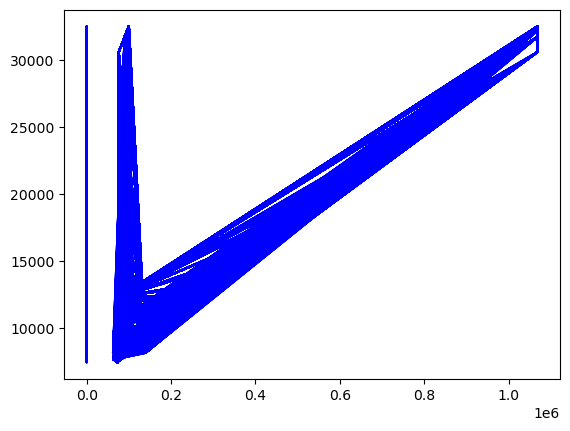

In [114]:
plt.plot(X_test,Y_pred, color="blue")
plt.show()

In [ ]:
#For Evaluation
from sklearn.metrics import mean_squared_error, r2_score